# **Assignment 3 - Text Mining**
## Author: Jake Brulato
## Tuesday 5:30 - 8:15 : Kornelia

**Problem description and questions:  The dataset boo_ratings.csv has reviews of books, along with other information, submitted on Amazon.  The descriptions of the columns are given below.**

- Id: Unique ID for the book 
- Title: Book’s title 
- Price: The price of Book 
- User_id: Unique ID of the user who rates the book 
- profileName: Name of the user who rates the book 
- review/helpfulness: Helpfulness rating (normalized to between 0 and 1) 
- review/score: Rating from 0 to 5 for the book 
- review/time: Time of given review 
- review/summary: The summary of a text review 
- review/text: The full text of a review 

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import pyLDAvis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy.cluster import hierarchy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### **1. (10 pts) Preprocess the text data in each of the "review/summary" and "review/text" columns. Preprocessing should include tokenization, lowercasing, stop word removal, stemming and any other necessary steps.  Describe each of the above step in the Word document.**

In [21]:
book_ratings_df = pd.read_csv('book_ratings.csv')
book_ratings_df.head()
book_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   object 
 1   Title               1000 non-null   object 
 2   Price               1000 non-null   float64
 3   User_id             1000 non-null   object 
 4   profileName         1000 non-null   object 
 5   review/helpfulness  715 non-null    float64
 6   review/score        1000 non-null   int64  
 7   review/time         1000 non-null   int64  
 8   review/summary      1000 non-null   object 
 9   review/text         1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define the preprocessing function
def preprocess_text(text):
    # Tokenization and lowercasing
    tokens = word_tokenize(text.lower())
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Joining tokens to form the preprocessed text string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

# Apply the preprocessing function to the "review/summary" and "review/text" columns
book_ratings_df['preprocessed_summary'] = book_ratings_df['review/summary'].apply(preprocess_text)
book_ratings_df['preprocessed_text'] = book_ratings_df['review/text'].apply(preprocess_text)

# Display the preprocessed text of the first few rows to ensure preprocessing was successful
book_ratings_df[['review/summary', 'preprocessed_summary', 'review/text', 'preprocessed_text']].head()

freq = pd.Series(' '.join(book_ratings_df['preprocessed_summary']).split()).value_counts()[:30]
print(freq)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rbrul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbrul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


book        168
great       101
good         70
read         66
excel        35
best         29
stori        25
love         24
one          23
must         20
wonder       18
like         15
look         15
time         15
life         14
amaz         13
ever         12
use          12
fun          12
review       12
interest     11
new          10
need         10
resourc      10
anoth        10
help          9
work          9
write         9
real          9
littl         9
Name: count, dtype: int64


In [10]:
freq2 = pd.Series(' '.join(book_ratings_df['preprocessed_text']).split()).value_counts()[:30]
print(freq2)

book       2252
read        855
one         564
like        406
stori       395
time        366
would       347
love        341
mani        300
good        295
get         288
make        288
author      287
great       286
use         279
life        261
way         259
quot        258
peopl       255
well        246
work        246
charact     240
also        239
help        235
much        222
first       216
think       211
want        210
even        206
take        199
Name: count, dtype: int64


### **2. (7 pts) Create word clouds for each of the "review/summary" and "review/text" columns, after preprocessing. Copy and paste the word clouds outputs in the Word document. Write one-two sentences for what you can interpret from each of the two word clouds.**

Word cloud for review/summary


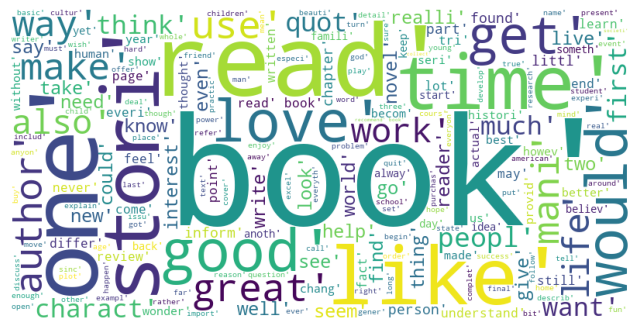

In [11]:
comment_words = str(' '.join(book_ratings_df['preprocessed_text']).split())

# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_words)

# if you get font error, can try the following
# wordcloud = WordCloud(font_path='/path/to/your/font.ttf', width=800, height=400, 
# background_color='white').generate(sample_text)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
print('Word cloud for review/text')
plt.show()

Word cloud for review/summary


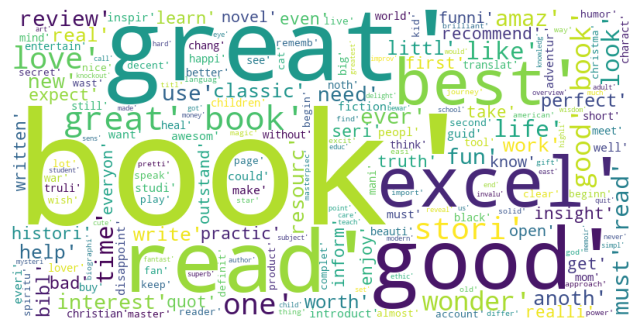

In [12]:
comment_words = str(' '.join(book_ratings_df['preprocessed_summary']).split())

# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_words)

# if you get font error, can try the following
# wordcloud = WordCloud(font_path='/path/to/your/font.ttf', width=800, height=400, 
# background_color='white').generate(sample_text)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
print('Word cloud for review/summary')
plt.show()

### **3. (8 pts) Perform text mining for each of the "review/summary" and "review/text" columns to estimate the similarity between documents. Show the similarity output tables for the first 5 documents for the summary and text columns. Paste the appropriate screenshots in the Word document.**

In [13]:
book_ratings_new = pd.read_csv('book_ratings.csv')

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# List of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Preprocess a single document: Tokenize, lowercase, remove stopwords, and stem."""
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove stopwords and stem
    filtered_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(filtered_tokens)

# Applying preprocessing to the first 5 documents of "review/summary" and "review/text"
book_ratings_new['processed_summary'] = book_ratings_new['review/summary'].astype(str).apply(preprocess_text).head(5)
book_ratings_new['processed_text'] = book_ratings_new['review/text'].astype(str).apply(preprocess_text).head(5)

# Display the preprocessed text for verification
book_ratings_new[['processed_summary', 'processed_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rbrul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbrul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,processed_summary,processed_text
0,got,got book version along romeo juliet pride pred...
1,outstand freethought,although pretti much alway natur atheist recen...
2,decent novel,first book read spark walk rememb book drawn r...
3,almost ident excel materi,excel refer howev awar provid much readili ava...
4,stilt prose,subject book fascin interest inform book book ...


In [16]:
# Simplified preprocessing without relying on NLTK for tokenization and stopwords removal
import re

def simplified_preprocess(text):
    """Simplified text preprocessing: lowercase and remove non-alphabetic characters."""
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply simplified preprocessing to the first 5 documents
book_ratings_new['simplified_summary'] = book_ratings_new['review/summary'].astype(str).apply(simplified_preprocess).head(5)
book_ratings_new['simplified_text'] = book_ratings_new['review/text'].astype(str).apply(simplified_preprocess).head(5)

# Vectorize the preprocessed text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# For "review/summary"
tfidf_summary = tfidf_vectorizer.fit_transform(book_ratings_new['simplified_summary'].dropna())
# For "review/text"
tfidf_text = tfidf_vectorizer.fit_transform(book_ratings_new['simplified_text'].dropna())

# Compute cosine similarity matrices
cosine_sim_summary = cosine_similarity(tfidf_summary)
cosine_sim_text = cosine_similarity(tfidf_text)

# Show the cosine similarity matrices for the first 5 documents
cosine_sim_summary, cosine_sim_text

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1.        , 0.11100354, 0.1027878 , 0.08013736, 0.14831019],
        [0.11100354, 1.        , 0.32114387, 0.30764133, 0.45050302],
        [0.1027878 , 0.32114387, 1.        , 0.25290957, 0.29415572],
        [0.08013736, 0.30764133, 0.25290957, 1.        , 0.3050699 ],
        [0.14831019, 0.45050302, 0.29415572, 0.3050699 , 1.        ]]))

### **4. (10 pts) Perform topic modeling on “review/text” using LDA model and generate 6 topics. In the word document, show the topic model output for each of the 6 topics as the linear combination of the terms. For 2 of the topics, write a short description in 2-3 sentences for each topic.**

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Since we've already defined a simplified_preprocess function, we'll reuse it here
# Apply simplified preprocessing to the "review/text" column for the entire dataset
processed_texts = book_ratings_new['review/text'].astype(str).apply(simplified_preprocess)

# Vectorize the preprocessed text using CountVectorizer, as LDA works with count data
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(processed_texts)

# Apply LDA to discover 6 latent topics
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
words = count_vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics[f"Topic {topic_idx}"] = top_words

topics

{'Topic 0': ['book',
  'read',
  'books',
  'great',
  'like',
  'just',
  'good',
  'time',
  'think',
  'reading'],
 'Topic 1': ['book',
  'life',
  'really',
  'like',
  'read',
  'way',
  'just',
  'good',
  'time',
  'did'],
 'Topic 2': ['book',
  'love',
  'read',
  'like',
  'great',
  'story',
  'life',
  'books',
  'good',
  'reading'],
 'Topic 3': ['book',
  'read',
  'like',
  'time',
  'history',
  'good',
  'story',
  'books',
  'great',
  'life'],
 'Topic 4': ['book',
  'read',
  'like',
  'just',
  'story',
  'books',
  'people',
  'time',
  'author',
  'good'],
 'Topic 5': ['book',
  'good',
  'story',
  'people',
  'like',
  'read',
  'way',
  'know',
  'work',
  'information']}

### **5. (15 pts) Build predictive models for review/score, as follows:**

### **a. Apply SVD to extract 5 components from the “review/text” column.**

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# We'll use the simplified preprocessing and TF-IDF vectorization from earlier steps
# Vectorize the preprocessed text using TF-IDF
tfidf_vectorizer_svd = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
tfidf_matrix_svd = tfidf_vectorizer_svd.fit_transform(processed_texts)

# Apply SVD to extract 5 components
svd = TruncatedSVD(n_components=5, random_state=42)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Fit and transform the data to 5 components
X_reduced = lsa.fit_transform(tfidf_matrix_svd)

# Check the shape of the output to confirm the reduction
X_reduced.shape

(1000, 5)

### **b. Combine two non-text columns with the 5 extracted components and build a decision tree model to predict the “review/score”. Call it Model-1.**

In [22]:
# Convert the non-text features to numeric values using appropriate encoding techniques
from sklearn.preprocessing import LabelEncoder

# Assuming 'Price' and 'User_id' are the two non-text columns selected
non_text_features = book_ratings_new[['Price', 'User_id']]

# Apply label encoding to convert string values to numeric values
label_encoder = LabelEncoder()
non_text_features['Price'] = label_encoder.fit_transform(non_text_features['Price'])
non_text_features['User_id'] = label_encoder.fit_transform(non_text_features['User_id'])

# Combine the SVD components with the non-text features
# Note: This assumes X_reduced and non_text_features are correctly aligned
X_combined = np.hstack([X_reduced, non_text_features.to_numpy()])

# The target variable


C:\Users\rbrul\AppData\Local\Temp\ipykernel_65320\3321102664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_text_features['Price'] = label_encoder.fit_transform(non_text_features['Price'])
C:\Users\rbrul\AppData\Local\Temp\ipykernel_65320\3321102664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_text_features['User_id'] = label_encoder.fit_transform(non_text_features['User_id'])


### **c. Report the confusion matrix of Model 1.**

### **d. Repeat tasks 5a-c with SVD to extract 8 components and build a predictive model. Call it Model-2. Report the confusion matrix of Model-2.**

### **e. Which model performs better?  Explain your answer.**